In [1]:
using MFCC
using DynamicAxisWarping
using MATLAB
using WAV
using Plots

In [2]:
# adding path and function to matlab engine

mat"addpath('../matlab;../matlab/AnalysisTools;../matlab/BlackCat;../matlab/ColoredNoise;../matlab/ModerMouthNoise;../matlab/RDP_demos;../matlab/STCode;../matlab/STCode/VocalTractData;../matlab/STCode/VokalTrakt_SideBranch;../matlab/SineWaveSpeech;../matlab/TubeTalkerMain;')"


In [3]:
# calling RDP generator function using matlab engine

audio = mxcall(
    :RDP_generator, # name of matlab function
    1, # number of output variables (just waveform in this case)
    90.0, # n
    0.0, # cflag
    1.0, # piri_1
    0.8, # piri_2
    0.7, # piri_3
    0.4, # piri_4
    120.0, # fotarg
    1.5, # lo
    0.3, # to
    0.065, # x02
    0.05, # xib
    0.85, # np
    0.002, # pgap
    8000.0, # pl
    500.0, # nzbw_1
    3000.0, # nzbw_2
    500.0, # nzbw2_1
    3000.0, #nzbw2_2
    mxcellarray([ # con
        mxcellarray([ # p
            -1.0,
            -1.0,
            -1.0,
            1.0,
            5.0,
            15.0,
            1.0,
            5.0,
            0.0
        ]),
        mxcellarray([ # a
            1.0,
            -0.3,
            0.0,
            0.7,
            25.0,
            40.0,
            1.0,
            0.0,
            0.0
        ]),
        mxcellarray([ # p
            -1.0,
            -1.0,
            -1.0,
            1.0,
            45.0,
            10.0,
            1.0,
            10.0,
            0.0
        ]),
        mxcellarray([ # a
            1.0,
            -0.3,
            0.0,
            0.7,
            65.0,
            30.0,
            1.0,
            40.0,
            0.0
        ])
    ]),
    mxcellarray([ # add
        mxcellarray([
            0.1,
            1.0,
            10.0,
            1.0,
            10.0
        ]),
        mxcellarray([
            0.1,
            48.0,
            10.0,
            1.0,
            5.0
        ]),
        mxcellarray([
            0.01,
            90.0,
            5.0,
            1.0,
            0.0
        ])
    ]),
    mxcellarray([ # press
        mxcellarray([
            -1.0,
            1.0,
            5.0,
            1.0,
            0.0 
        ]),
        mxcellarray([
            -1.0,
            90.0,
            5.0,
            1.0,
            0.0
        ])
    ]),
    mxcellarray([ # nas
        mxcellarray([
            0.0,
            5.0,
            15.0,
            1.0,
            5.0,
        ]),
        mxcellarray([
            0.0,
            45.0,
            15.0,
            1.0,
            0.0
        ])
    ]),
    mxcellarray([ # f0
        mxcellarray([
            -0.15,
            1.0,
            30.0,
            1.0,
            0.0,
        ]),
        mxcellarray([
            0.3,
            25.0,
            25.0,
            1.0,
            0.0,
        ]),
        mxcellarray([
            0.1,
            60.0,
            25.0,
            1.0,
            0.0,
        ]),
        mxcellarray([
            -0.3,
            90.0,
            40.0,
            1.0,
            0.0
        ])
    ])
    )

using SensitiveTalker_Norm_SBranch_AltCalc

Fs =

       44100

 
Using area compressor version - TubeTalkerAC

tmp =

  logical

   0

0 jitter added to F0 contour

Nsim =

       27232

Adduction NOT normalized
Piriform entry = 1 cm2
NEW Adduction-based amplitude attenuation is enabled! 
43 0.282598
Noise generator in tract turned ON

ans =

     0


ans =

     0


sf =

    1.4792

Skin radiation filtered

i =

    10


i =

    20


i =

    30


i =

    40


i =

    50


i =

    60


i =

    70


i =

    80


i =

    90



1×27232 Matrix{Float64}:
 0.0  3.21111e-7  5.84578e-7  7.89666e-7  …  -2.04907e-6  -8.00488e-7  -0.0

In [4]:
m = mfcc(vec(audio), 44100)[1]

60×13 Matrix{Float64}:
 -19.2489   32.6928  -22.5719   …  30.4878   12.9239     -0.613111
 -21.3788   30.2739  -29.7929      21.6324    5.77316    -8.33309
 -45.4915   25.2522  -20.0687      21.0105    6.86098    -8.44673
 -70.8121   26.7654   14.9013       3.67977   0.540686   -3.77047
 -48.8933   16.8329   -3.95938     12.4774    8.98978    -0.709991
 -12.2274   26.3149  -19.046    …  13.8731    6.99634    -4.6924
 -12.4377   54.0637  -46.4616      20.4917    4.52954     1.56978
   5.87429  35.3595  -42.1965      25.7012   -0.573236   -5.64837
   9.11059  34.403   -38.5679      30.5628    9.26003    -2.62355
  12.296    38.7671  -24.3082      23.0483   -0.400541   -8.19622
   ⋮                            ⋱   ⋮                   
  29.5989   40.2256  -27.3672      19.5359   -5.24212   -14.1144
  30.8234   36.1448  -24.5009      15.5366   -5.7074    -11.4599
  25.3527   46.671   -32.1746      20.3065   -9.14392   -14.7458
  27.7191   40.8058  -26.5838      20.992    -5.57109   -16.0118

In [5]:
display(m)

60×13 Matrix{Float64}:
 -19.2489   32.6928  -22.5719   …  30.4878   12.9239     -0.613111
 -21.3788   30.2739  -29.7929      21.6324    5.77316    -8.33309
 -45.4915   25.2522  -20.0687      21.0105    6.86098    -8.44673
 -70.8121   26.7654   14.9013       3.67977   0.540686   -3.77047
 -48.8933   16.8329   -3.95938     12.4774    8.98978    -0.709991
 -12.2274   26.3149  -19.046    …  13.8731    6.99634    -4.6924
 -12.4377   54.0637  -46.4616      20.4917    4.52954     1.56978
   5.87429  35.3595  -42.1965      25.7012   -0.573236   -5.64837
   9.11059  34.403   -38.5679      30.5628    9.26003    -2.62355
  12.296    38.7671  -24.3082      23.0483   -0.400541   -8.19622
   ⋮                            ⋱   ⋮                   
  29.5989   40.2256  -27.3672      19.5359   -5.24212   -14.1144
  30.8234   36.1448  -24.5009      15.5366   -5.7074    -11.4599
  25.3527   46.671   -32.1746      20.3065   -9.14392   -14.7458
  27.7191   40.8058  -26.5838      20.992    -5.57109   -16.0118

In [13]:
cost_matrix = zeros(length(m[1, :]), length(m[1, :]))

for i in 1:length(m[1, :]) # for each window
    for j in 1:length(m[1, :]) # for each window
        v1 = m[i, :]
        v2 = m[j, :]
        cost, i1, i2 = dtw(v1, v2)
        cost_matrix[i, j] = cost
    end
end


display(cost_matrix)

13×13 Matrix{Float64}:
    0.0     374.473  1141.92    5924.29  …   3037.66    4518.28    5390.45
  374.473     0.0     757.187   5716.51      3465.11    5040.03    6139.27
 1141.92    757.187     0.0     2953.22      6274.4     7897.76    9180.77
 5924.29   5716.51   2953.22       0.0      13565.6    13525.9    15007.2
 3183.99   2876.43   1340.21     934.3       9908.94    9424.52   10263.3
  844.839   480.427  1260.36    5057.37  …   3807.91    4257.25    4576.18
 1411.87   1496.01   3339.65    9597.11      2855.29    4786.17    5702.99
 1378.65   1224.66   3642.2    11282.7       1596.17    3050.16    3924.99
 1439.11   1508.94   3958.4    11288.8       1733.22    2849.18    3520.53
 1897.88   2175.76   4573.6    11063.3        679.755   1499.21    1802.52
 3037.66   3465.11   6274.4    13565.6   …      0.0      811.583   1541.67
 4518.28   5040.03   7897.76   13525.9        811.583      0.0      175.702
 5390.45   6139.27   9180.77   15007.2       1541.67     175.702      0.0

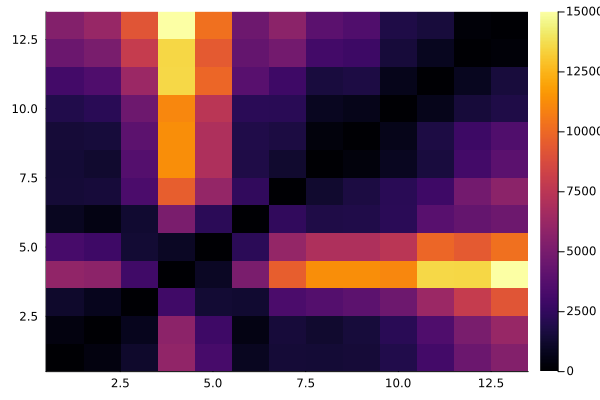

In [18]:
heatmap(cost_matrix)